In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [3]:
data.shape

(5572, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [50]:
data.sample(10)

,target,text,num_of_char,no_of_words,no_of_sent
3275,0,Lol your right. What diet? Everyday I cheat an...,78,21,4
4457,0,Die... I accidentally deleted e msg i suppose ...,89,22,4
5396,0,As in i want custom officer discount oh.,40,9,1
2306,0,"Aight that'll work, thanks",26,6,1
1722,0,Thought praps you meant another one. Goodo! I'...,63,13,3
3553,0,am up to my eyes in philosophy,30,7,1
4015,0,In which place i can get rooms cheap:-),39,11,1
2927,0,Anything...,11,2,1
34,1,Thanks for your subscription to Ringtone UK yo...,159,30,2
3611,0,"K, my roommate also wants a dubsack and anothe...",138,30,1


In [7]:
data.rename(columns={
    'v1':'target',
    'v2' : 'text'
},inplace=True)

In [8]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [9]:
data['target'] = enc.fit_transform(data['target'])

In [10]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
data.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
data.duplicated().sum()

403

In [13]:
data = data.drop_duplicates(keep='first')

In [14]:
data.duplicated().sum()

0

In [15]:
data.shape

(5169, 2)

EDA

In [16]:
data['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

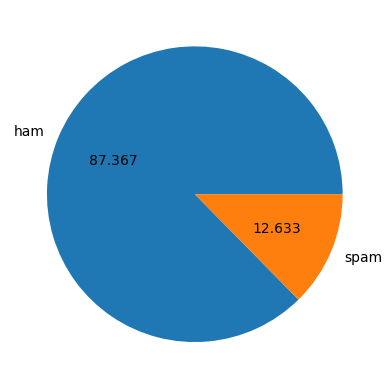

In [17]:
plt.pie(data['target'].value_counts(),labels=["ham","spam"],autopct='%0.3f')
plt.show()

In [18]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aryan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
data['text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [20]:
data['num_of_char'] = data['text'].apply(len)

In [21]:
data.head()

,target,text,num_of_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
data['no_of_words'] = data['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [23]:
data.head()

,target,text,num_of_char,no_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [24]:
data['no_of_sent'] = data['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [25]:
data.head()

,target,text,num_of_char,no_of_words,no_of_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
data.describe()

,target,num_of_char,no_of_words,no_of_sent
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.453279,1.947185
std,0.332253,58.236293,13.324793,1.362406
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,28.000000


In [37]:
data[data['target'] == 0][['num_of_char','no_of_words','no_of_sent']].describe()

,num_of_char,no_of_words,no_of_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [36]:
data[data['target'] == 1][['num_of_char','no_of_words','no_of_sent']].describe()

,num_of_char,no_of_words,no_of_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


<Axes: xlabel='num_of_char', ylabel='Count'>

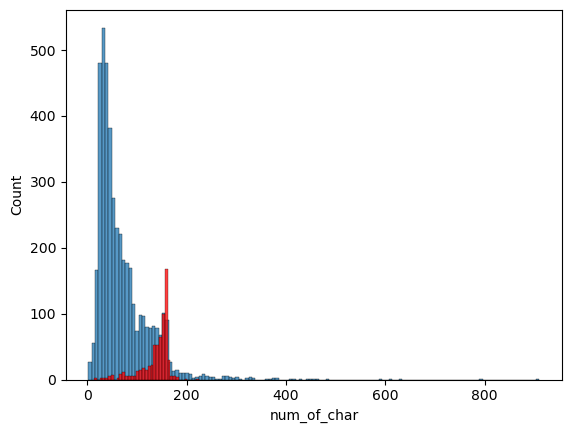

In [49]:
sns.histplot(data[data['target']==0]['num_of_char'])
sns.histplot(data[data['target']==1]['num_of_char'],color='red')

<Axes: xlabel='no_of_words', ylabel='Count'>

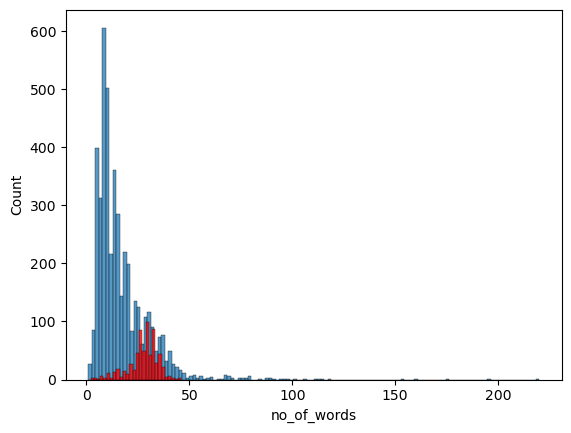

In [47]:
sns.histplot(data[data['target']==0]['no_of_words'])
sns.histplot(data[data['target']==1]['no_of_words'],color='red')

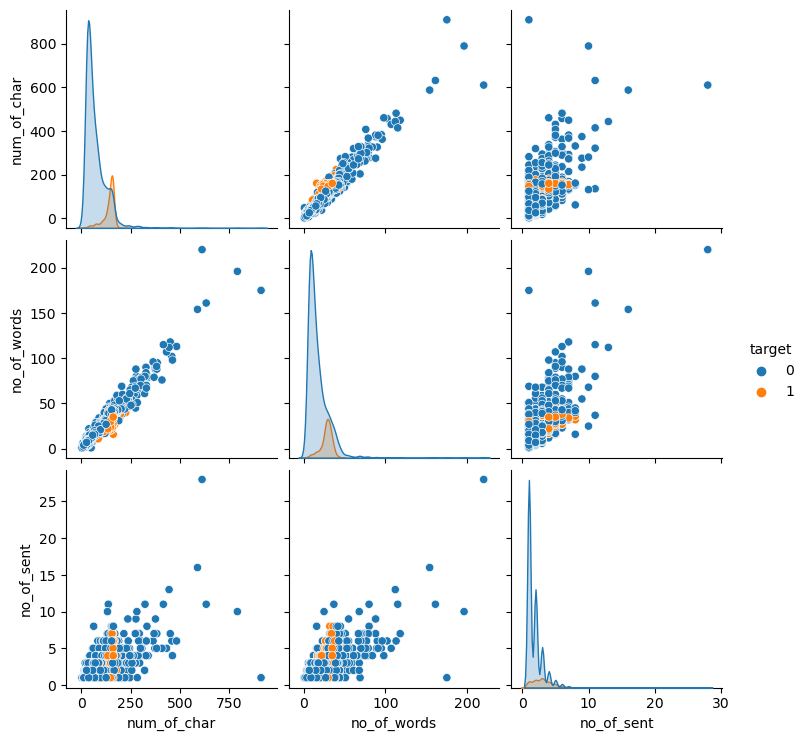

In [52]:
sns.pairplot(data,hue='target')

C:\Users\aryan\AppData\Local\Temp\ipykernel_7392\2578434383.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

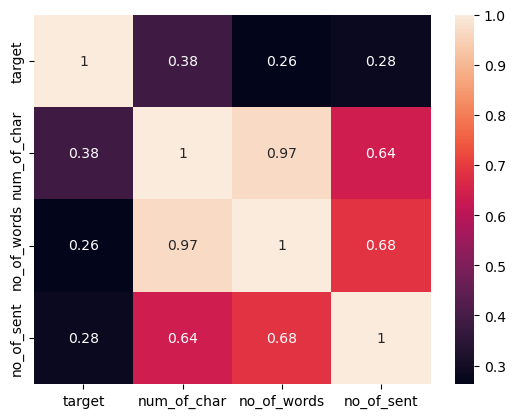

In [55]:
sns.heatmap(data.corr(),annot=True)